In [1]:
import pandas as pd
import numpy as np
import pickle
from pyMetaheuristic.algorithm import ant_lion_optimizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler

import sys
sys.path.append('../')
from visualization import visualization_table
import pickle
from tqdm import tqdm

In [2]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C': [5, 10],
    'gamma': [0.001, 0.005],
    'degree': [2, 3]
}   

def find_best_model(datasets, param_grid=param_grid):
    '''
    
    Generate datasets into classification reports object
    
    Parameters:
    datasets: object of dataset consist of (X_train, y_train, X_test, y_test)
    param_grid: consist of parameters which user for finding the most optimal model parameters

    Returns:
    Object of classification reports

    '''

    results = {}

    for dataset, (X_train, X_test, y_train, y_test) in datasets.items():
    
        model = SVC()
        grid_search = GridSearchCV(model, param_grid, cv=5)
        %time grid_search.fit(X_train, y_train)

        svc_best = SVC(**grid_search.best_params_)
        svc_best.fit(X_train, y_train)
        
        y_pred = svc_best.predict(X_test)
        
        y_train_pred = svc_best.predict(X_train)
        train_class_report = classification_report(y_train, y_train_pred, zero_division=False, output_dict=True)
        test_class_report = classification_report(y_test, y_pred, zero_division=False, output_dict=True)
        
        # Check for overfitting
        train_accuracy = train_class_report['accuracy']
        test_accuracy = test_class_report['accuracy']
        
        if train_accuracy > test_accuracy:
            print(f"{dataset} model is overfitting.")
        else:
            print(f"{dataset} model is not overfitting.")
            
        results[dataset] = class_report

    return results

In [3]:
data = pd.read_pickle("resesi_38k.pkl")

In [4]:
datasets = {}

In [5]:
for sampler, labels in data.items():
    for label, data in labels.items():
        datasets[f'{label}_{sampler}'] = data 

In [6]:
datasets

{'Vader_Normal': (<28321x28177 sparse matrix of type '<class 'numpy.float64'>'
  	with 311300 stored elements in Compressed Sparse Row format>,
  <9441x28177 sparse matrix of type '<class 'numpy.float64'>'
  	with 103066 stored elements in Compressed Sparse Row format>,
  10108    negative
  30725    negative
  18254    negative
  28727    negative
  17187    negative
             ...   
  19515    negative
  37477    negative
  22041    negative
  3920     negative
  8598     negative
  Name: Label Vader, Length: 28321, dtype: object,
  9488     positive
  37216    negative
  27744    negative
  18292    positive
  14944     neutral
             ...   
  3123     negative
  35697    negative
  13976    negative
  3405     negative
  12230    negative
  Name: Label Vader, Length: 9441, dtype: object),
 'TextBlob_Normal': (<28321x28177 sparse matrix of type '<class 'numpy.float64'>'
  	with 310572 stored elements in Compressed Sparse Row format>,
  <9441x28177 sparse matrix of type '<cl

In [7]:
from scipy.sparse import save_npz

save_npz('X_train_ros_after.npz', datasets['After_RandomOversampler']['Vader'][0])
save_npz('X_test_ros_after.npz', datasets['After_RandomOversampler']['Vader'][1])
y_train_ros_after = datasets['After_RandomOversampler']['Vader'][2]
y_test_ros_after = datasets['After_RandomOversampler']['Vader'][3]
y_train_ros_after.to_csv(f'./y_train_ros_after.csv')
y_test_ros_after.to_csv(f'./y_test_ros_after.csv')

In [8]:
save_npz('X_train_smote_after.npz', datasets['After_SMOTE']['Vader'][0])
save_npz('X_test_smote_after.npz', datasets['After_SMOTE']['Vader'][1])
y_train_smote_after = datasets['After_SMOTE']['Vader'][2]
y_test_smote_after = datasets['After_SMOTE']['Vader'][3]
y_train_smote_after.to_csv(f'./y_train_smote_after.csv')
y_test_smote_after.to_csv(f'./y_test_smote_after.csv')

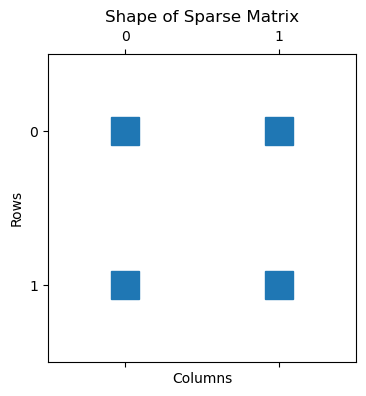

In [9]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Create a sample sparse matrix
data = [1, 2, 3, 4]
row = [0, 0, 1, 1]
col = [0, 1, 0, 1]
sparse_matrix = csr_matrix((data, (row, col)), shape=(2, 2))

# Visualize the shape of the sparse matrix
plt.figure(figsize=(4, 4))
plt.spy(sparse_matrix, markersize=20)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Shape of Sparse Matrix')
plt.show()

In [10]:
sparse_matrix

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [11]:
df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)
df

,0,1
0,1,2
1,3,4


In [13]:
from scipy.sparse import load_npz
X_train = load_npz('./Vader/X_train.npz')

In [14]:
df2 = pd.DataFrame.sparse.from_spmatrix(X_train)
df2

,0,1,2,3,4,5,6,7,8,9,...,28167,28168,28169,28170,28171,28172,28173,28174,28175,28176
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
